## Select one road


In [3]:
%load_ext autoreload
%autoreload 2
import file_handler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re


In [4]:

def getRoadChart(road):
    city = 'تهران'

    roads = []

    for year in range(1395, 1403):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    
    return df


In [5]:

# df2 = getRoadChart('113201')

# plt.figure()  # Create a new figure for each plot
# plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])

# # Customize x-axis ticks and labels
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# # Add more customization as needed

# # Add title, labels, legend, etc.
# plt.title(file_handler.persin_fix('title'))
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.legend(['Legend'])


In [6]:
# get all codes for tehran
codes = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),file_handler.get_dayly_data_path_with_year_month_city('1395','2','تهران')))


In [7]:
t = file_handler.get_dayly_data_path_with_year_month_city('1395','2','تهران')
names = {}
for i in range(len(t)):
    names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])


In [8]:
roads = dict()
for code in codes:
    roads[code] = getRoadChart(str(code))

/tmp/ipykernel_329142/1319043241.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


In [9]:
# Working with an example df
df = roads['113201']
type(df)


# TODO smooth worked time


# df.loc[df['مدت زمان کارکرد(دقیقه)'] < 1440]
df.drop(columns='index', inplace=True)



In [10]:
from sklearn.linear_model import LinearRegression
regression = dict()

for i in  range(len(codes)):
    model = LinearRegression()
    df = getRoadChart(codes[i])

    y = df['تعداد کل وسیله نقلیه']
    x = np.reshape(df.index, (-1,1))
    model.fit(x, y)
    regression[codes[i]] = model



KeyboardInterrupt: 

In [ ]:
for (code,name ) in enumerate(names):
    print(names[name] + " : " + str(regression[name].coef_))


‫آزادراه قم - گرمسار‬ : [0.71145024]
‫تهران - قم (آزادراه)‬ : [-3.45287074]
‫تهران - ساوه (ابتداي آزادراه)‬ : [-3.63527606]
‫تهران - جاجرود‬ : [0.2037514]
‫تهران - پرديس (ابتداي آزادراه)‬ : [2.43813245]
‫تهران - ‍پرديس (انتهاي آزادراه)‬ : [4.17938032]
‫تهران - پاکدشت‬ : [-5.62668682]
‫عوارضي تهران - قم‬ : [-3.99508953]
‫چرمشهر - حسن‌آباد ‬ : [0.8491198]
‫امام زاده داوود - تهران‬ : [-0.07217046]
‫تهران - لواسان (طلاييه)‬ : [-1.25936475]
‫تهران - لواسان (سوهانک)‬ : [0.15163055]
‫آزادراه تهران - ساوه(پرند)‬ : [4.94595403]
‫آزادراه گرمسار - قم‬ : [0.56684358]
‫قم - تهران (آزادراه)‬ : [-4.05427864]
‫ساوه - تهران (ابتداي آزادراه)‬ : [0.70824497]
‫جاجرود - تهران‬ : [1.33224067]
‫پرديس - تهران (ابتداي آزادراه)‬ : [3.37700578]
‫پرديس - تهران (انتهاي آزادراه)‬ : [8.91990877]
‫پاکدشت - تهران‬ : [-1.56803076]
‫قم - تهران عوارضي‬ : [0.40086028]
‫حسن آباد - چرمشهر‬ : [0.41707046]
‫تهران - امام زاده داوود‬ : [-0.09764096]
‫لواسان - تهران (طلاييه)‬ : [-3.73722788]
‫لواسان - تهران (سوهانک)‬ : [0.079489

In [ ]:

regression = {k: v for k, v in regression.items() if v != {}}

sorted_models = sorted(regression.items(), key=lambda x: x[1].coef_[0])

for (name, coef) in sorted_models:
    print(names[name], regression[name].coef_)

‫همت - وردآورد‬ [-14.14302403]
‫آزادراه کرج - تهران (عوارضي قديم)‬ [-11.49917608]
‫تهران - پاکدشت‬ [-5.62668682]
‫قم - تهران (آزادراه)‬ [-4.05427864]
‫عوارضي تهران - قم‬ [-3.99508953]
‫لواسان - تهران (طلاييه)‬ [-3.73722788]
‫تهران - ساوه (ابتداي آزادراه)‬ [-3.63527606]
‫تهران - قم (آزادراه)‬ [-3.45287074]
‫شهريار - تهران (چيتگر - باغستان)‬ [-2.93530699]
‫ري - قرچک ‬ [-2.43670848]
‫وردآورد - همت‬ [-1.97549841]
‫پاکدشت - تهران‬ [-1.56803076]
‫آزادراه تهران - کرج (عوارضي قديم)‬ [-1.40120143]
‫اسلامشهر - واوان‬ [-1.31435299]
‫امامزاده هاشم - سه راهي مشاء‬ [-1.27375213]
‫ديزين - شمشک‬ [-1.26354478]
‫تهران - لواسان (طلاييه)‬ [-1.25936475]
‫واوان - اسلامشهر‬ [-1.24703248]
‫شمشک - ديزين‬ [-1.1908655]
‫حسن آباد - تهران (جاده قديم قم)‬ [-0.92333275]
‫ميگون - شمشک‬ [-0.67955198]
‫سربندان - امين آباد ‬ [-0.54861659]
‫سه راهي مشاء - امامزاده هاشم‬ [-0.51239174]
‫سه راهي ارجمند - فيروزکوه‬ [-0.2982392]
‫ميگون - فشم‬ [-0.27698221]
‫تهران - شهريار (دپو)‬ [-0.14941899]
‫فشم - ميگون‬ [-0.09894417]
‫تهرا

In [14]:
# Now lets plot some of these.
import file_handler
import importlib
importlib.reload(file_handler)


road_min = sorted_models[0]
road_max = sorted_models[-1]
df1=roads[road_min[0]]
df2=roads[road_max[0]]
ax = df1.iloc[:, [6]].plot(title=file_handler.persian_fix(names[road_min[0]]))
df2.iloc[:, [6]].plot(ax = ax, title=file_handler.persian_fix(names[road_max[0]]))



NameError: name 'sorted_models' is not defined

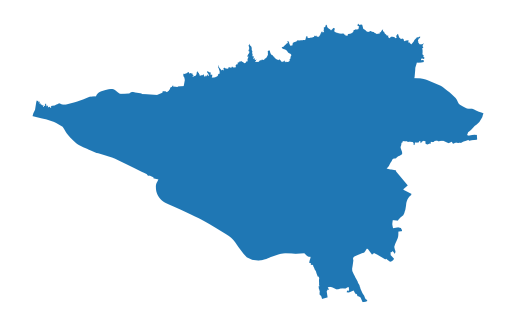

In [19]:
import osmnx as ox
city = ox.places = ox.geocode_to_gdf(['Tehran'])

ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

/tmp/ipykernel_280605/4214847888.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')


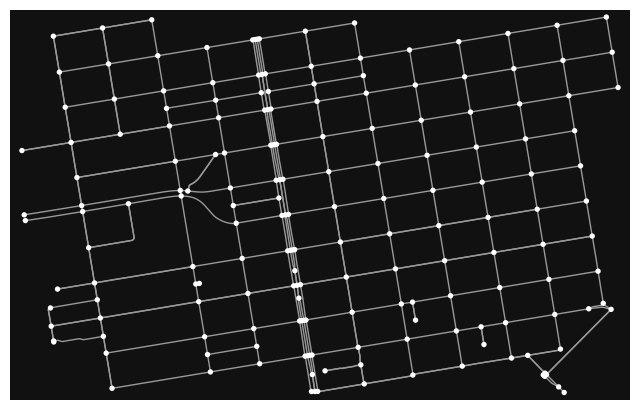

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

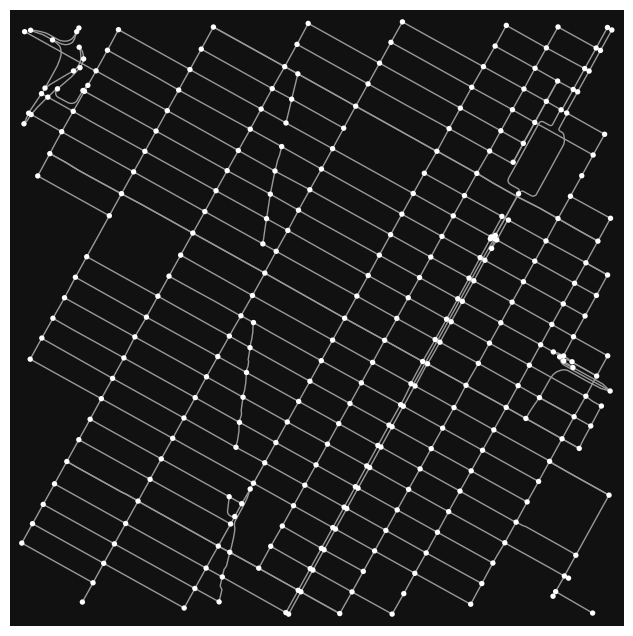

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

/tmp/ipykernel_280605/449147392.py:4: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.get_undirected(G)


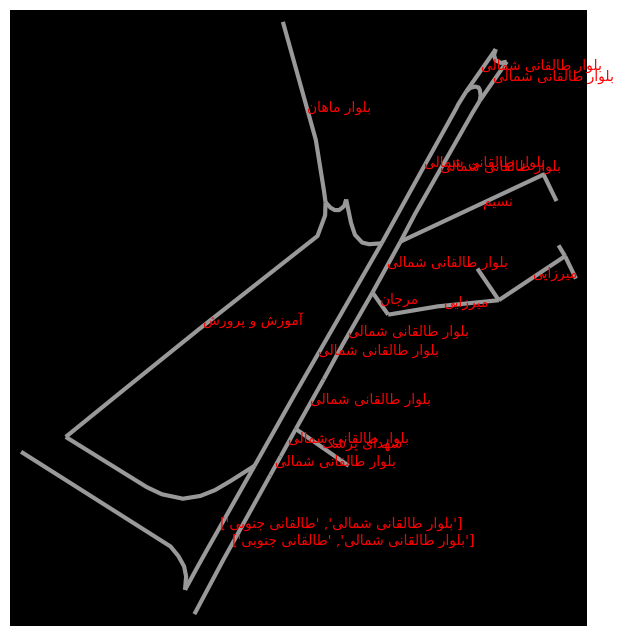

In [ ]:
# G = ox.graph_from_place('کرج - آزادگان', network_type='drive', simplify=True)
# ox.plot_graph(G)
G = ox.graph_from_address('کرج', dist=200, network_type='drive')
G = ox.get_undirected(G)

fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.title.set_color('red')

    ax.annotate(file_handler.persian_fix(text), (c.x, c.y), c='red')
plt.show()

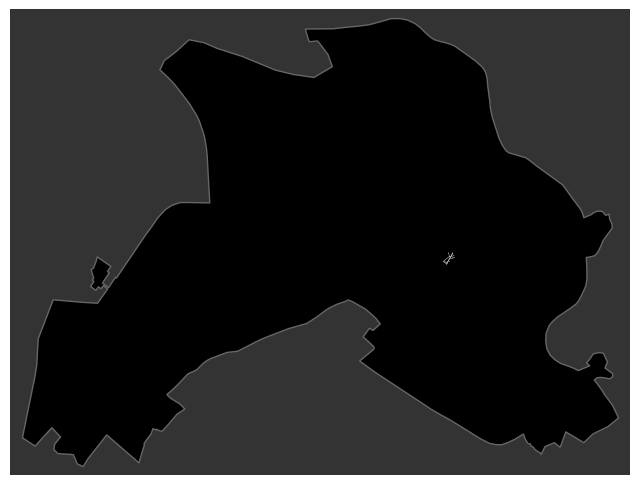

In [ ]:
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)
gdf = ox.geocode_to_gdf("کرج")

# to this matplotlib axis, add the place shape(s)
gdf.plot(ax=ax, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [20]:
place = ["Tehran, Iran"]
cf = '["highway"~"trunk|motorway|primary"]'
# G = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='all', custom_filter=cf)
G = ox.graph_from_bbox(bbox=(36.1290,35.1525,52.4501,50.2940), retain_all=True, simplify = True, network_type='all', custom_filter=cf)

# Prepare data
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True): # added ww
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)


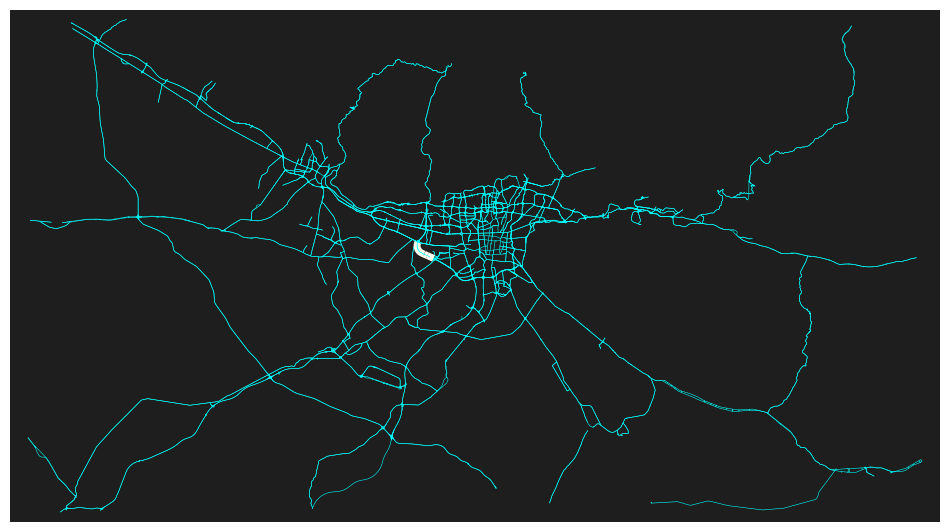

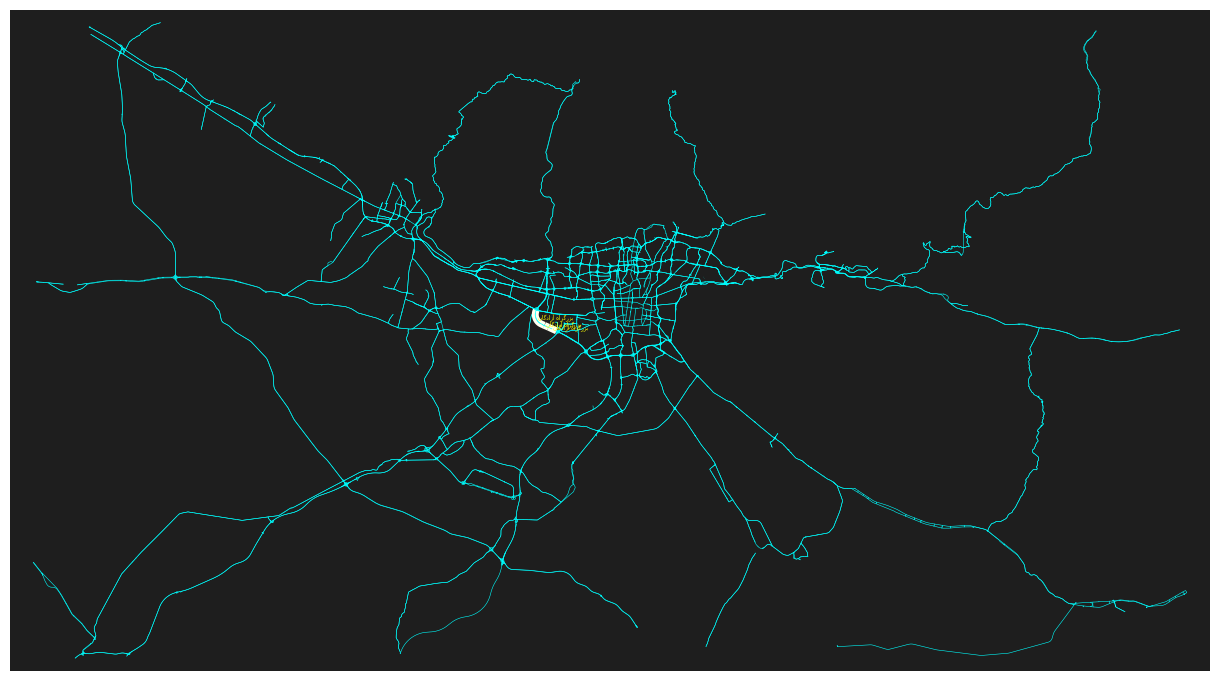

In [27]:
roadCols = []
edge_width = []

for item in data:
    if "osmid" in item.keys():
        if item["osmid"] == 449543314:
            color = "#FFFFF0"
            edge = 5
        else:
            color = "#00FFFF"
            edge = 0.4
    else:
        color = "#FFFFFF"
    roadCols.append(color)
    edge_width.append(edge)

#Plot
bgcolor = "#1e1e1e"
fig, ax = ox.plot_graph(G, node_size=0,
                        dpi = 500,bgcolor = bgcolor,
                        save = False, edge_color=roadCols,
                        edge_linewidth=edge_width, edge_alpha=1, figsize=(12,12))

# fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
#                         show=False, close=False)
e1 = None
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    if(edge['osmid'] == 449543314):
        c = edge['geometry'].centroid
        text = edge['name']
        ax.title.set_size(14)
        e1 = edge
        ax.annotate(file_handler.persian_fix(text), (c.x, c.y), c='yellow', size=4)

# fig.show()

fig.tight_layout(pad=0)
fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",
            facecolor=fig.get_facecolor(), transparent=False)
fig

In [25]:
e1

osmid                                               449543314
oneway                                                   True
ref                                                        48
name                                          بزرگراه آزادگان
highway                                                 trunk
maxspeed                                                   90
reversed                                                False
length                                               3339.849
geometry    LINESTRING (51.2481313 35.6598841, 51.2480646 ...
lanes                                                       4
bridge                                                       
tunnel                                                       
junction                                                     
access                                                       
width                                                        
Name: (4074730712, 4074777094, 0), dtype: object

In [ ]:
data_df.loc[ data_df['osmid'] == 449543314]

,osmid,highway,oneway,reversed,length,ref,name,maxspeed,geometry,lanes,bridge,junction,tunnel,access


In [ ]:
data.

[{'osmid': 4316294,
  'oneway': True,
  'ref': '307',
  'name': 'محمدعلی حبیب الله',
  'highway': 'secondary',
  'maxspeed': '50',
  'reversed': False,
  'length': 18.635},
 {'osmid': 884218508,
  'oneway': True,
  'name': 'کنارگذر آزادی',
  'highway': 'secondary',
  'maxspeed': '50',
  'reversed': False,
  'length': 23.987},
 {'osmid': 400484686,
  'highway': 'primary_link',
  'oneway': False,
  'reversed': True,
  'length': 14.86},
 {'osmid': 1226989651,
  'oneway': True,
  'ref': '374',
  'name': 'ستارخان',
  'highway': 'primary',
  'maxspeed': '50',
  'reversed': False,
  'length': 167.25},
 {'osmid': 4292778,
  'oneway': True,
  'lanes': '4',
  'ref': '297',
  'name': 'شادمهر',
  'highway': 'secondary',
  'maxspeed': '50',
  'reversed': False,
  'length': 22.747,
  'geometry': <LINESTRING (51.368 35.714, 51.368 35.714, 51.368 35.714)>},
 {'osmid': 314589627,
  'highway': 'secondary',
  'maxspeed': '50',
  'oneway': False,
  'reversed': False,
  'length': 21.132},
 {'osmid': 916688

In [40]:
names.keys()

dict_keys(['113201', '113203', '113204', '113205', '113206', '113207', '113209', '113210', '113211', '113212', '113213', '113214', '113228', '113251', '113253', '113254', '113255', '113256', '113257', '113259', '113260', '113261', '113262', '113263', '113264', '113278', '113302', '113352', '113401', '113403', '113404', '113408', '113413', '113414', '113415', '113416', '113417', '113418', '113419', '113424', '113451', '113453', '113454', '113458', '113463', '113464', '113465', '113466', '113467', '113468', '113469', '113474', '113501', '113502', '113551', '113552', '113801', '113802', '113803', '113804', '113851', '113852', '113853', '113854', '113903', '113904', '113953', '113954', '114101', '114102', '114151', '114152', '114206', '114256', '114301', '114302', '114351', '114352', '114401', '114451', '114501', '114551', '114552'])